![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/spark-ocr-workshop/tree/master/jupyter/Cards/SparkOcrPretrainedPipelinesImageHandwrittenTransformerExtraction.ipynb)

# Example of Pretrained Pipelines

Pretrained Pipelines can be considered predefined recipes in the form of Visual NLP pipelines, these recipes come with a set of stages and parameters that help to accomplish specific tasks.

## Blogposts and videos

- [Text Detection in Spark OCR](https://medium.com/spark-nlp/text-detection-in-spark-ocr-dcd8002bdc97)

- [Table Detection & Extraction in Spark OCR](https://medium.com/spark-nlp/table-detection-extraction-in-spark-ocr-50765c6cedc9)

- [Extract Tabular Data from PDF in Spark OCR](https://medium.com/spark-nlp/extract-tabular-data-from-pdf-in-spark-ocr-b02136bc0fcb)

- [Signature Detection in Spark OCR](https://medium.com/spark-nlp/signature-detection-in-spark-ocr-32f9e6f91e3c)

- [GPU image pre-processing in Spark OCR](https://medium.com/spark-nlp/gpu-image-pre-processing-in-spark-ocr-3-1-0-6fc27560a9bb)

- [How to Setup Spark OCR on UBUNTU - Video](https://www.youtube.com/watch?v=cmt4WIcL0nI)


**More examples here**

https://github.com/JohnSnowLabs/spark-ocr-workshop

### Colab Setup

In [1]:
import json, os
import sys

if 'google.colab' in sys.modules:
    from google.colab import files

    if 'spark_ocr.json' not in os.listdir():
      license_keys = files.upload()
      os.rename(list(license_keys.keys())[0], 'spark_ocr.json')

with open('spark_ocr.json') as f:
    license_keys = json.load(f)

# Defining license key-value pairs as local variables
locals().update(license_keys)

Saving spark_nlp_for_healthcare_spark_ocr_9387.json to spark_nlp_for_healthcare_spark_ocr_9387.json


In [2]:
!pip install transformers

# Installing pyspark and spark-nlp
%pip install --upgrade -q pyspark==3.2.1 spark-nlp==$PUBLIC_VERSION

# Installing Spark OCR
#! pip uninstall spark-ocr -Y
%pip install spark-ocr==$OCR_VERSION --extra-index-url=https://pypi.johnsnowlabs.com/$SPARK_OCR_SECRET --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 579.2/579.2 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 kB 12.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://pypi.johnsnowlabs.com/5.4.0-f40a4114fd59c8d06434c58c9e28fa076aa4af9e
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 MB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 83.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 89.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 5.0 MB/s eta 0:

<b><h1><font color='darkred'>!!! ATTENTION !!! </font><h1><b>

<b>After running previous cell, <font color='darkred'>RESTART the COLAB RUNTIME </font> and go ahead.<b>

### Initialize Spark session

In [1]:
import json, os

with open("spark_ocr.json", 'r') as f:
  license_keys = json.load(f)

# Adding license key-value pairs to environment variables
os.environ.update(license_keys)

# Defining license key-value pairs as local variables
locals().update(license_keys)

In [2]:
from pyspark.ml import PipelineModel
import pyspark.sql.functions as f

from sparkocr import start
from sparkocr.transformers import *
from sparkocr.enums import *
from sparkocr.utils import *
from sparkocr.metrics import score

In [3]:
# Start spark
spark = start(secret=SPARK_OCR_SECRET, nlp_version=PUBLIC_VERSION)

Spark version: 3.2.1
Spark NLP version: 5.4.0
Spark OCR version: 5.4.0



## Load Pretrained Pipelines


In [4]:
from sparknlp.pretrained import PretrainedPipeline

pipeline = PretrainedPipeline('basic_table_extractor', 'en', 'clinical/ocr')

basic_table_extractor download started this may take some time.
Approx size to download 23.1 MB
[OK!]


## Call the pipeline

In [17]:
img_path = '/content/table4_1.jpg'
img_example_df = spark.read.format("binaryFile").load(img_path).cache()
result = pipeline.transform(img_example_df)
result

image,path,modificationTime,length,pagenum,hocr,cells,tables,exception,table_index
{file:/content/ta...,file:/content/tab...,2024-08-14 08:17:...,172124,0,<div class='ocr...,"[{0, 0, 693.0, 17...","{{0, 0, 0.0, 0.0,...",null,0



    Image #0:
    Origin: file:/content/table4_1.jpg
    Resolution: 0 dpi
    Width: 1000 px
    Height: 1095 px
    Mode: ImageType.TYPE_BYTE_GRAY
    Number of channels: 1


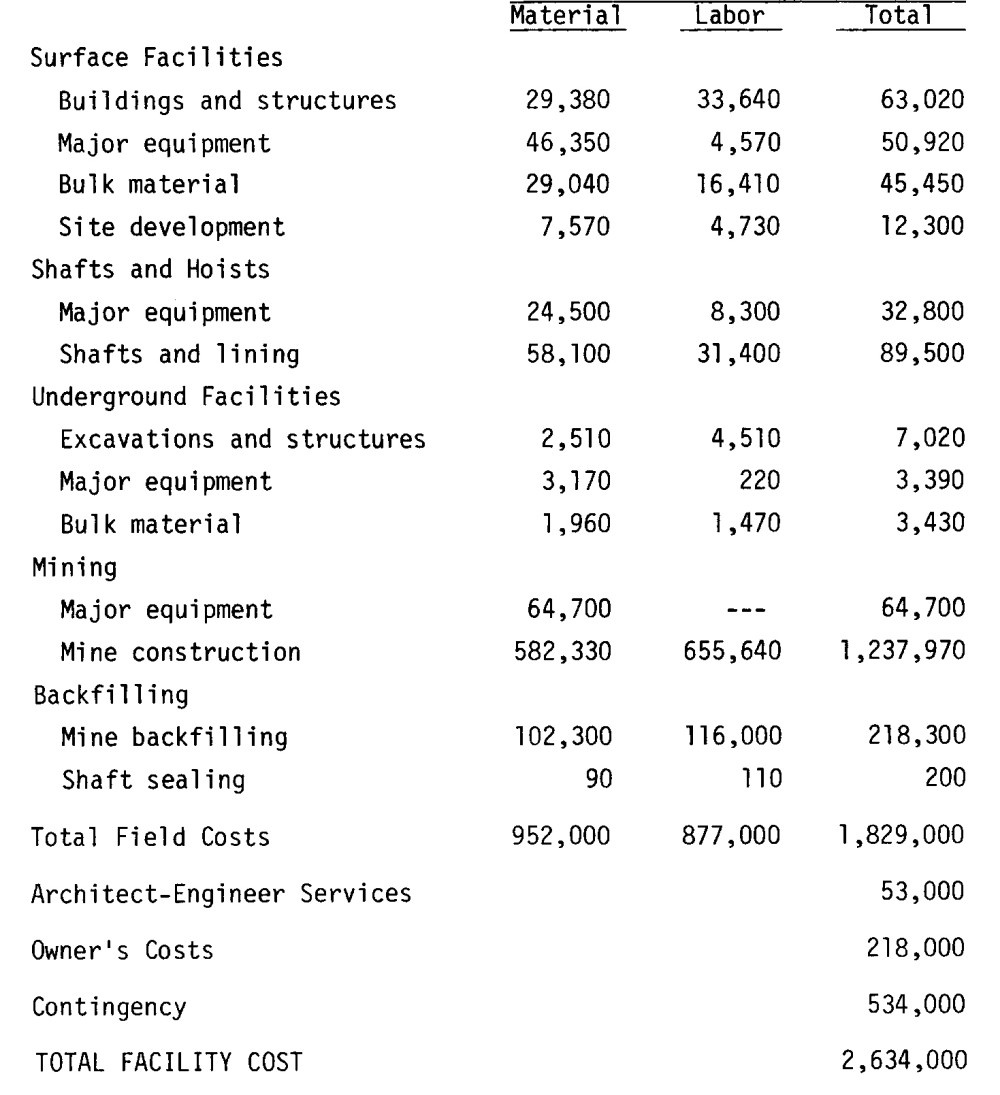

In [18]:
display_images(result, "image", width=1000)

In [19]:
display_tables(result, table_col = "tables", table_index_col = "table_index")

Filename: table4_1.jpg
Page: 0
Table: 0
Number of Columns: 4


col0,col1,col2,col3
Empty,Material,Labor,Total
Surface Facilities,Empty,Empty,Empty
Buildings and structures,"29,380","33,640","63,020"
Major equipment,"46 ,350","4,570","50,920"
Bulk material,"29,040","16,410","45,450"
Site development,"7,570","4,730","12,300"
Shafts and Hoists,Empty,Empty,Empty
Major equipment,"24,500","8,300","32,800"
Shafts and lining,"58,100","31,400","89,500"
Underground Facilities,Empty,Empty,Empty
